 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [192]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [193]:
# Reading whale returns

whale_returns = Path("Resources\whale_returns.csv")
whale_df = pd.read_csv(whale_returns, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [194]:
# Count nulls
whale_nulls = whale_df.isna().sum()
whale_nulls

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [195]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [196]:
# Reading algorithmic returns
algo_returns = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_returns, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_df

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [197]:
# Count nulls
algo_nulls = algo_df.isna().sum()
algo_nulls

Algo 1    0
Algo 2    6
dtype: int64

In [198]:
# Drop nulls# Drop nulls
algo_df.dropna(inplace=True)
algo_df


,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [199]:
# Reading S&P 500 Closing Prices
spy_path = Path("Resources\sp500_history.csv")
spy_returns = pd.read_csv(spy_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
spy_returns

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06
...,...
2012-10-05,$1460.93
2012-10-04,$1461.40
2012-10-03,$1450.99


In [200]:
# Check Data Types
#print(whale_df.dtypes)
#print(algo_df.dtypes)
print(spy_returns.dtypes)

Close    object
dtype: object


In [201]:
# Fix Data Types

spy_returns["Close"] = spy_returns['Close'].replace({'\\$': ''}, regex = True)
spy_returns['Close'] = spy_returns['Close'].astype(float)

print(spy_returns.dtypes)
print(spy_returns)

Close    float64
dtype: object
              Close
Date               
2019-04-23  2933.68
2019-04-22  2907.97
2019-04-18  2905.03
2019-04-17  2900.45
2019-04-16  2907.06
...             ...
2012-10-05  1460.93
2012-10-04  1461.40
2012-10-03  1450.99
2012-10-02  1445.75
2012-10-01  1444.49

[1649 rows x 1 columns]


In [202]:
# Calculate Daily Returns
daily_returns= spy_returns.pct_change()
daily_returns


,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [203]:
# Drop nulls

daily_returns.dropna(inplace=True)

daily_returns


,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [204]:
# Rename `Close` Column to be specific to this portfolio.
daily_returns.columns = ["S&P Daily Change"]
daily_returns

,S&P Daily Change
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


## Combine Whale, Algorithmic, and S&P 500 Returns

In [205]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_df, algo_df, daily_returns] , axis="columns", join="inner")
combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P Daily Change
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns of All Portfolios'}, xlabel='Date'>

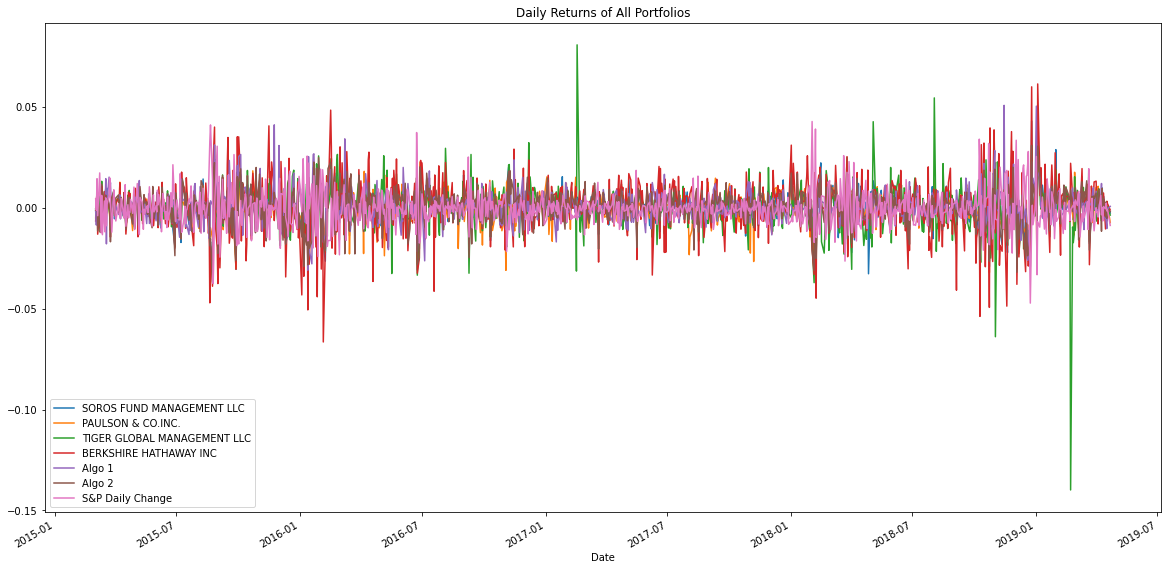

In [206]:
# Plot daily returns of all portfolios
combined_df.plot( title = "Daily Returns of All Portfolios", figsize = (20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

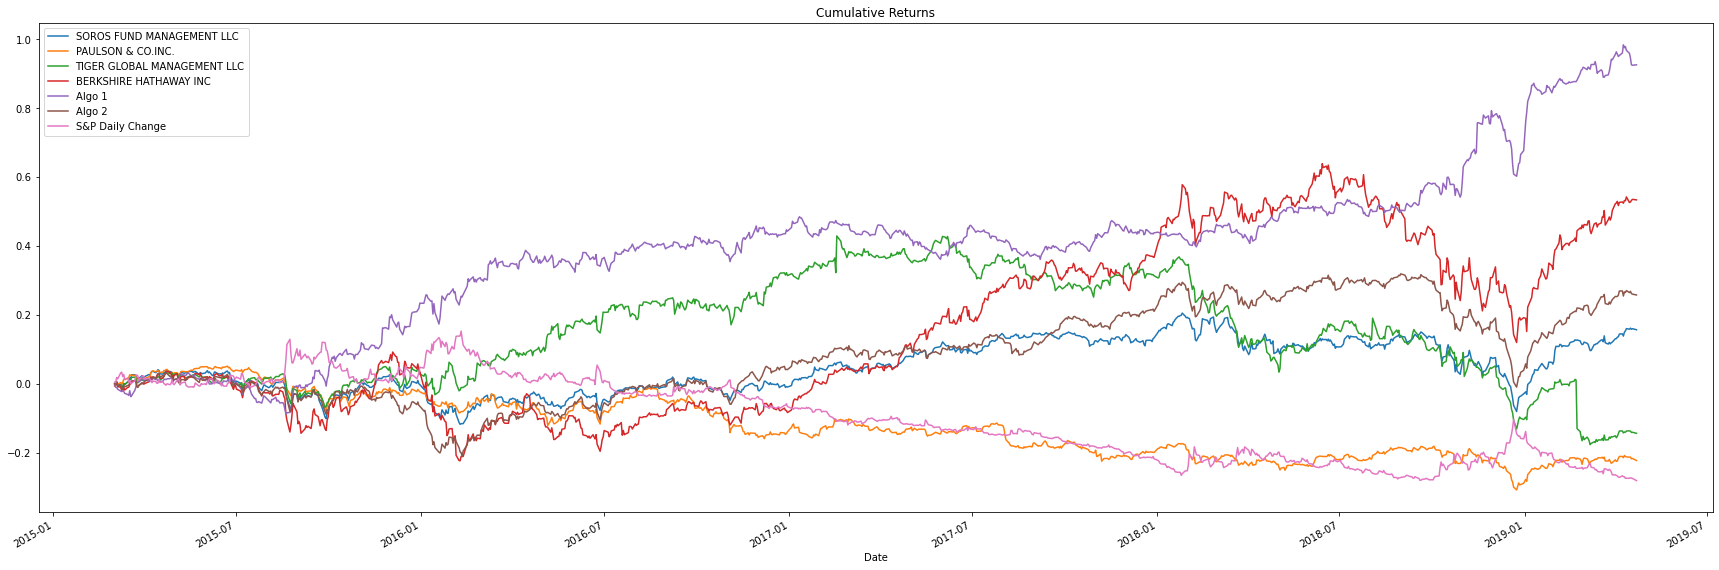

In [207]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod() -1
cumulative_returns.plot(title = "Cumulative Returns" , figsize = (30,10))
# Plot cumulative returns


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Cumulative Box Plot'}>

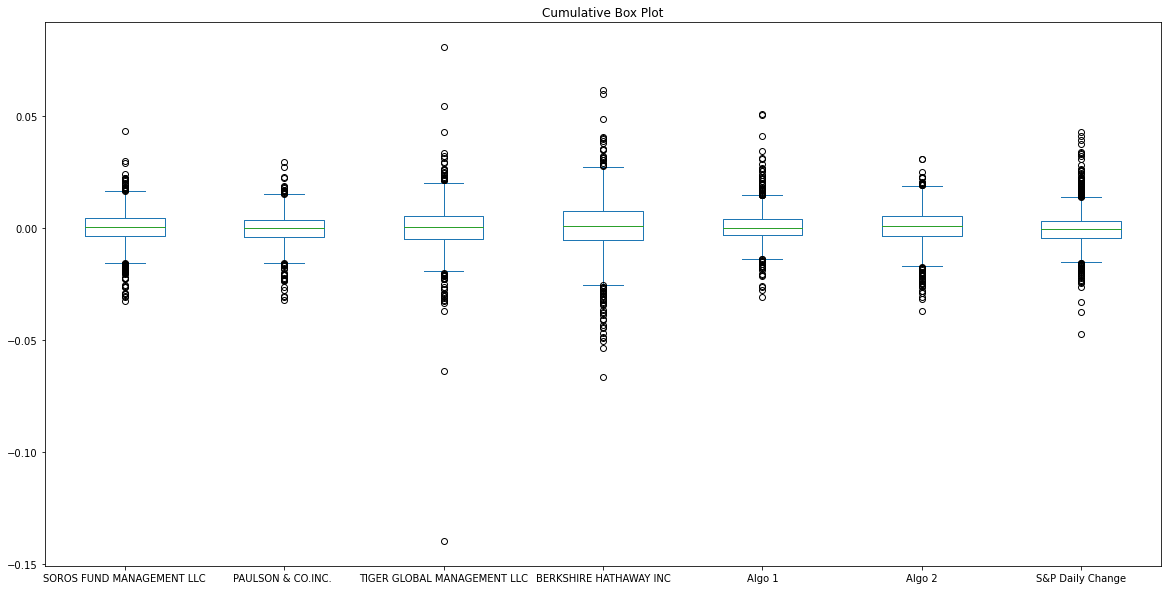

In [208]:
# Box plot to visually show risk
combined_df.plot.box(title = "Cumulative Box Plot", figsize= (20,10))


### Calculate Standard Deviations

In [209]:
# Calculate the daily standard deviations of all portfolios
combined_df.std()


SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P Daily Change               0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [210]:
# Calculate  the daily standard deviation of S&P 500
daily_std = combined_df["S&P Daily Change"].std()
daily_std
# Determine which portfolios are riskier than the S&P 500
combined_df.std() > daily_std


SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P Daily Change               False
dtype: bool

### Calculate the Annualized Standard Deviation

In [211]:
# Calculate the annualized standard deviation (252 trading days)
annual_std = combined_df.std() * np.sqrt(252)
annual_std

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P Daily Change               0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling 21 Day STD '}, xlabel='Date'>

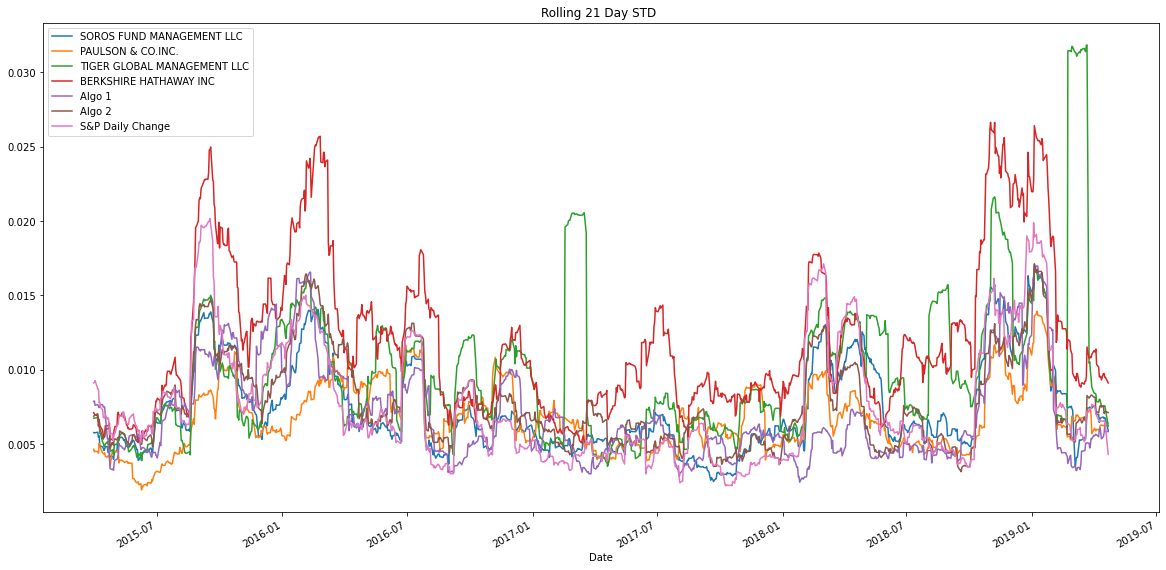

In [212]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_21 = combined_df.rolling(window = 21).std()


# Plot the rolling standard deviation
rolling_21.plot(title = "Rolling 21 Day STD ", figsize = (20,10))

### Calculate and plot the correlation

In [213]:
# Calculate the correlation
corr_df = combined_df.corr()

# Display de correlation matrix
corr_df.style.background_gradient(cmap = "summer")

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P Daily Change
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P Daily Change,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Beta of Berkshire Hathaway'}, xlabel='Date'>

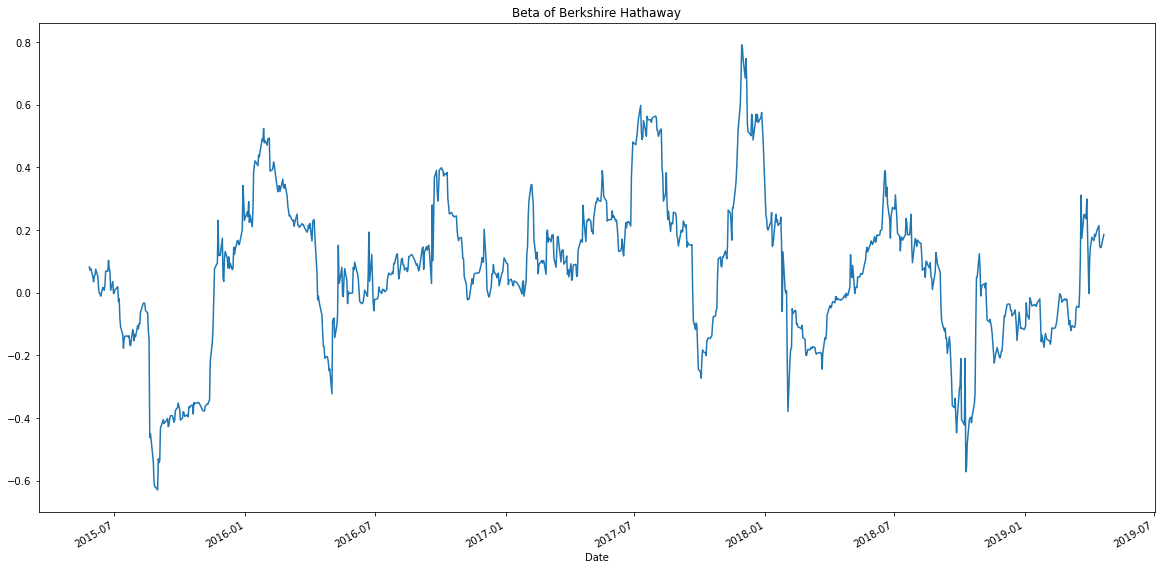

In [214]:
# Calculate covariance of a single portfolio
covar = combined_df["BERKSHIRE HATHAWAY INC"].rolling(window = 60).cov(combined_df["S&P Daily Change"])
# Calculate variance of S&P 500
variance_spy = combined_df["S&P Daily Change"].rolling(window=60).var()
# Computing beta
beta_spy = covar / variance_spy
# Plot beta trend
beta_spy.plot(title = "Beta of Berkshire Hathaway", figsize=(20,10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:title={'center':'Exponentially Weighted Average'}, xlabel='Date'>

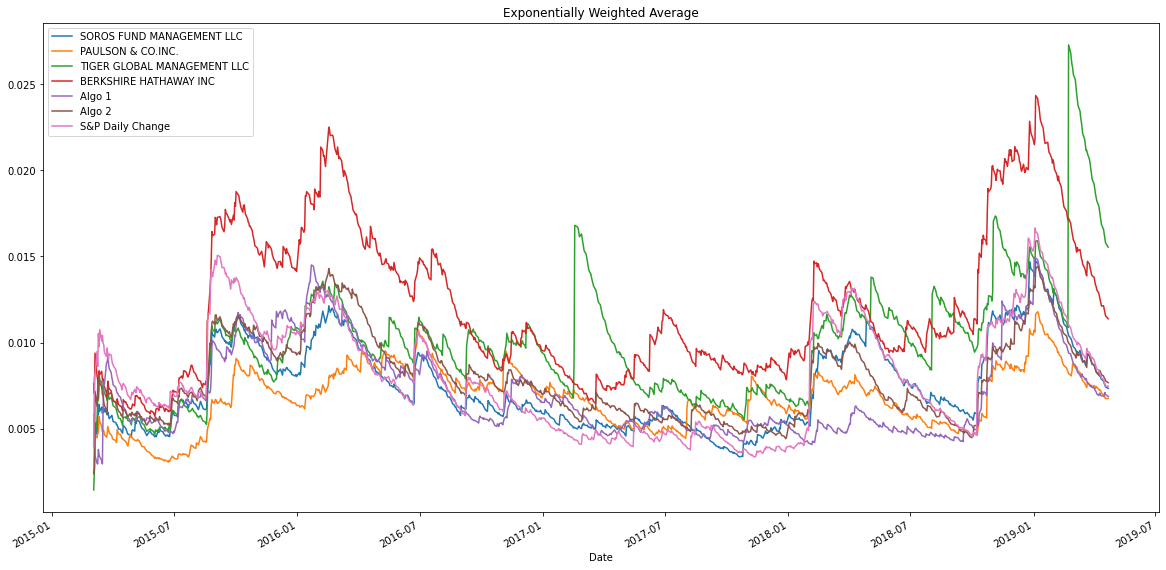

In [215]:
# Use `ewm` to calculate the rolling window
combined_df.ewm(halflife=21).std().plot(title = "Exponentially Weighted Average", figsize= (20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [216]:
# Annualized Sharpe Ratios
sharp = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharp

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P Daily Change              -0.518582
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

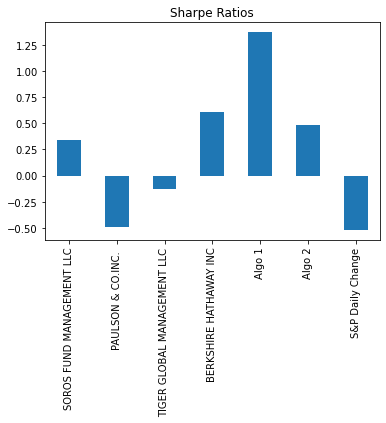

In [217]:
# Visualize the sharpe ratios as a bar plot
sharp.plot.bar(title = "Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

Algo1 out performed all portfolios. Berkshire Hathaway performed better than Algo1. All portfolios out perfomred the S&P 500, with Paulson & CO. performing closest.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [218]:
# Reading data from 1st stock
aapl_returns = Path("Resources/aapl_historical.csv")
aapl_df = pd.read_csv(aapl_returns, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
aapl_df.head()
print(aapl_df.dtypes)

Symbol     object
NOCP      float64
dtype: object


In [219]:
# Reading data from 2nd stock
cost_returns = Path("Resources\cost_historical.csv")
cost_df = pd.read_csv(cost_returns, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
cost_df.head()
print(cost_df.dtypes)

Symbol     object
NOCP      float64
dtype: object


In [220]:
# Reading data from 3rd stock
goog_returns = Path("Resources\goog_historical.csv")
goog_df = pd.read_csv(goog_returns, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
goog_df.head()
print(goog_df.dtypes)

Symbol     object
NOCP      float64
dtype: object


In [221]:
# Combine all stocks in a single DataFrame
blended_df = pd.concat([aapl_df, cost_df, goog_df] , axis="columns", join="inner")
blended_df

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2019-05-09,AAPL,200.72,COST,243.47,GOOG,1162.38
2019-05-08,AAPL,202.90,COST,241.34,GOOG,1166.27
2019-05-07,AAPL,202.86,COST,240.18,GOOG,1174.10
2019-05-06,AAPL,208.48,COST,244.23,GOOG,1189.39
2019-05-03,AAPL,211.75,COST,244.62,GOOG,1185.40
...,...,...,...,...,...,...
2018-05-17,AAPL,186.99,COST,199.60,GOOG,1078.59
2018-05-16,AAPL,188.18,COST,198.71,GOOG,1081.77
2018-05-15,AAPL,186.44,COST,195.48,GOOG,1079.23


In [222]:
# Reset Date index
blended_df.reset_index()


,Trade DATE,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
0,2019-05-09,AAPL,200.72,COST,243.47,GOOG,1162.38
1,2019-05-08,AAPL,202.90,COST,241.34,GOOG,1166.27
2,2019-05-07,AAPL,202.86,COST,240.18,GOOG,1174.10
3,2019-05-06,AAPL,208.48,COST,244.23,GOOG,1189.39
4,2019-05-03,AAPL,211.75,COST,244.62,GOOG,1185.40
...,...,...,...,...,...,...,...
245,2018-05-17,AAPL,186.99,COST,199.60,GOOG,1078.59
246,2018-05-16,AAPL,188.18,COST,198.71,GOOG,1081.77
247,2018-05-15,AAPL,186.44,COST,195.48,GOOG,1079.23
248,2018-05-14,AAPL,188.15,COST,195.88,GOOG,1100.20


In [223]:
# Reorganize portfolio data by having a column per symbol
reorganized_df = blended_df
reorganized_df.columns=["Symbol", "AAPL NOCP", "Symbol", "COST NOCP", "Symbol", "GOOG NOCP"]
drop_df = reorganized_df.drop('Symbol', axis = 1)

drop_df


,AAPL NOCP,COST NOCP,GOOG NOCP
Trade DATE,,,
2019-05-09,200.72,243.47,1162.38
2019-05-08,202.90,241.34,1166.27
2019-05-07,202.86,240.18,1174.10
2019-05-06,208.48,244.23,1189.39
2019-05-03,211.75,244.62,1185.40
...,...,...,...
2018-05-17,186.99,199.60,1078.59
2018-05-16,188.18,198.71,1081.77
2018-05-15,186.44,195.48,1079.23


In [224]:
# Calculate daily returns

dr_df = drop_df.pct_change()

# Drop NAs
drop_na = dr_df.dropna()

# Display sample data
drop_na.head(10)

,AAPL NOCP,COST NOCP,GOOG NOCP
Trade DATE,,,
2019-05-08,0.010861,-0.008749,0.003347
2019-05-07,-0.000197,-0.004806,0.006714
2019-05-06,0.027704,0.016862,0.013023
2019-05-03,0.015685,0.001597,-0.003355
2019-05-02,-0.012279,-0.007890,-0.019226
2019-05-01,0.006550,-0.004533,0.004705
2019-04-30,-0.046789,0.016309,0.017465
2019-04-29,0.019634,-0.005091,0.083384
2019-04-26,-0.001515,-0.001883,-0.011960


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [225]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = drop_na.dot(weights)
# Display sample data
portfolio_returns.head(10)

Trade DATE
2019-05-08    0.001820
2019-05-07    0.000570
2019-05-06    0.019196
2019-05-03    0.004642
2019-05-02   -0.013131
2019-05-01    0.002241
2019-04-30   -0.004339
2019-04-29    0.032642
2019-04-26   -0.005120
2019-04-25    0.001745
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [226]:
# Join your returns DataFrame to the original returns DataFrame
joined_df = drop_na.merge(portfolio_returns.to_frame(), left_index=True, right_index=True)
joined_df.columns=["AAPL NOCP", "COST NOCP", "GOOG NOCP", "Portfolio Returns"]

##joined_df = drop_na.join(portfolio_returns, "Portfolio Returns")
joined_df

,AAPL NOCP,COST NOCP,GOOG NOCP,Portfolio Returns
Trade DATE,,,,
2019-05-08,0.010861,-0.008749,0.003347,0.001820
2019-05-07,-0.000197,-0.004806,0.006714,0.000570
2019-05-06,0.027704,0.016862,0.013023,0.019196
2019-05-03,0.015685,0.001597,-0.003355,0.004642
2019-05-02,-0.012279,-0.007890,-0.019226,-0.013131
...,...,...,...,...
2018-05-17,0.003650,0.003217,0.011469,0.006112
2018-05-16,0.006364,-0.004459,0.002948,0.001618
2018-05-15,-0.009246,-0.016255,-0.002348,-0.009283


In [227]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
joined_df.isnull().head(10)


,AAPL NOCP,COST NOCP,GOOG NOCP,Portfolio Returns
Trade DATE,,,,
2019-05-08,False,False,False,False
2019-05-07,False,False,False,False
2019-05-06,False,False,False,False
2019-05-03,False,False,False,False
2019-05-02,False,False,False,False
2019-05-01,False,False,False,False
2019-04-30,False,False,False,False
2019-04-29,False,False,False,False
2019-04-26,False,False,False,False


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [228]:
# Calculate the annualized `std`
new_std = joined_df.std()
new_std

AAPL NOCP            0.018923
COST NOCP            0.013439
GOOG NOCP            0.016714
Portfolio Returns    0.013363
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling 21 Day STD '}, xlabel='Trade DATE'>

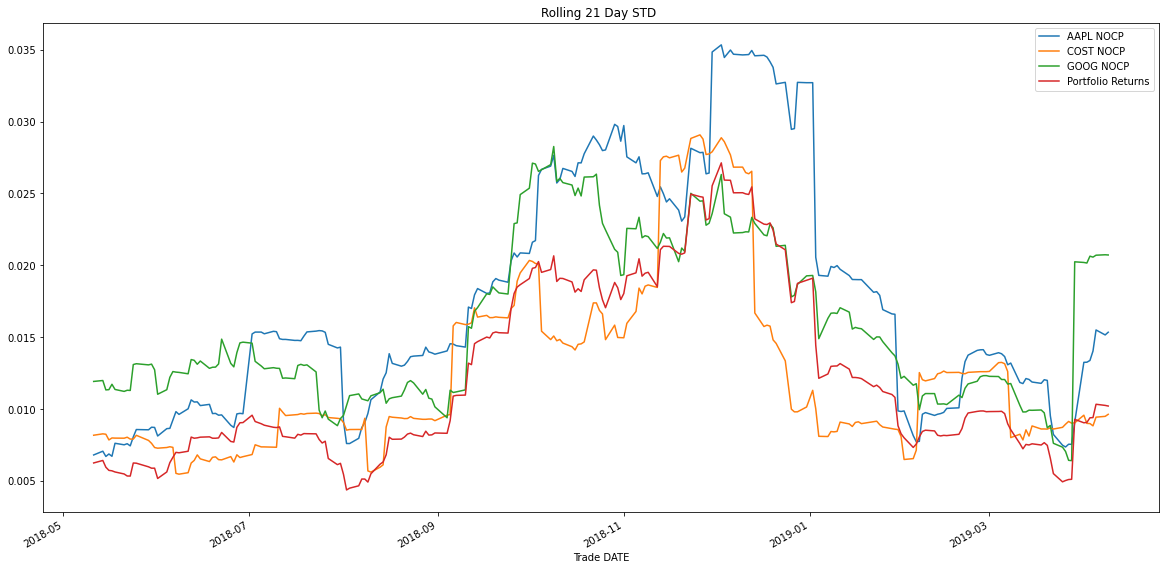

In [229]:
# Calculate rolling standard deviation
roll_for21 = joined_df.rolling(window = 21).std()
# Plot rolling standard deviation
roll_for21.plot(figsize=(20,10),title="Rolling 21 Day STD ")



### Calculate and plot the correlation

<AxesSubplot:>

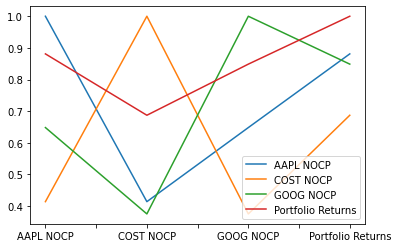

In [230]:
# Calculate and plot the correlation
correlation_df = joined_df.corr()
correlation_df.plot()

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Beta of My Custom Portfolio'}>

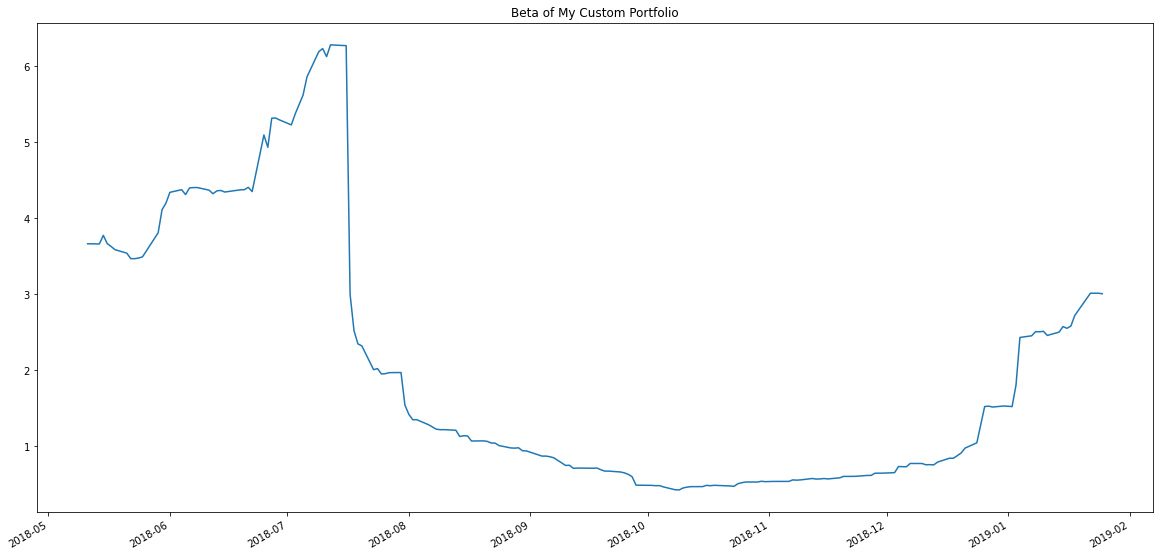

In [231]:
# Calculate and plot Beta
final_df = pd.concat([joined_df,daily_returns], axis="columns", join="inner")
covar_custom = final_df["Portfolio Returns"].cov(final_df["S&P Daily Change"])
vary = final_df['S&P Daily Change'].rolling(window=60).var()
cust_beta = covar_custom / vary
cust_beta.plot(title = "Beta of My Custom Portfolio", figsize=(20,10))


In [232]:
final_df

,AAPL NOCP,COST NOCP,GOOG NOCP,Portfolio Returns,S&P Daily Change
2019-04-22,-0.014218,-0.008796,-0.012423,-0.011812,-0.008764
2019-04-18,-0.003276,0.009818,-0.009985,-0.001148,-0.001011
2019-04-17,-0.003581,-0.001017,-0.000024,-0.001541,-0.001577
2019-04-16,-0.019101,-0.000896,-0.007449,-0.009149,0.002279
2019-04-15,-0.000100,0.004035,-0.004914,-0.000326,-0.000509
...,...,...,...,...,...
2018-05-17,0.003650,0.003217,0.011469,0.006112,0.002639
2018-05-16,0.006364,-0.004459,0.002948,0.001618,0.000857
2018-05-15,-0.009246,-0.016255,-0.002348,-0.009283,-0.004044
2018-05-14,0.009172,0.002046,0.019431,0.010216,0.006889


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [233]:
# Calculate Annualized Sharpe Ratios
sharper = (final_df.mean() * 252) / (final_df.std() * np.sqrt(252))
sharper

AAPL NOCP           -0.189008
COST NOCP           -1.008538
GOOG NOCP           -0.459788
Portfolio Returns   -0.613547
S&P Daily Change    -0.432942
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

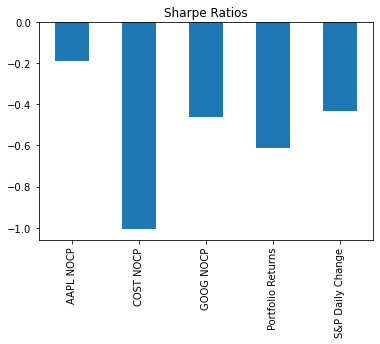

In [234]:
# Visualize the sharpe ratios as a bar plot
sharper.plot.bar(title="Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

In [ ]:
## My portfolio has a lower Sharpe Ration than the S&P 500, so I would not invest in it.